# DATA - Advanced Methods of Data Processing 
## Exercise: Data Analytics Mathematics 1 (statistics and distribution) in Jupyter

In this exercise we change to new ping file `google2_ping.txt`. And we'll do some more analysis about it's ping delay values.

In [1]:
## Your code here 
print("Exercise by: Janne Bragge")

Exercise by: Janne Bragge


#### Step 1: Read the data 
**Task 1:** Read `../data/google2_ping.txt` to pandas dataframe `google2_df`. 

File is saved with command: `ping -c 100  www.google.com > google2_ping.txt`

**Hint.** You can copy your solutions from Pandas exercise.

In [2]:
## Task 1:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

!cp ../data/google2_ping.txt temp.txt

with open("temp.txt", "r") as file:
    lines = file.readlines()
with open("temp.txt", "w") as file:
    file.writelines(lines[1:-4])

!sed -i -e 's/timeout/NaN/g' temp.txt

!sed -i 's/^.*time=\(.*\) ms$/\1/; s/^Request NaN for icmp_seq.*$/NaN/' temp.txt


google2_data = !cat temp.txt 
google2_list = list(np.float_(google2_data))
google2_df = pd.DataFrame(google2_list) 

 

#### Step 2: Check if the dataframe is correct 
**Task 2:** Plot 'google2_df' dafaframe to see if it is ok. And print it's length. 

(**Hint.** The length should be 100.)

google2_df length is: 100


<Axes: >

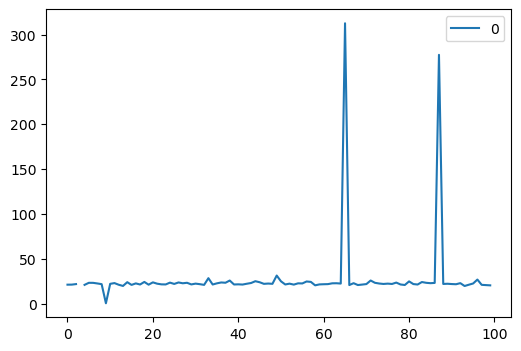

In [3]:
## Task 2:
google2_df_length = len(google2_df)
print('google2_df length is:', google2_df_length)

google2_df.plot(figsize=(6,4))

 

#### Step 3: Data statistics 
Now this 'google2_df' is our dataset. 

**Task 3:** Let's now print following dataset parameters:
1. Count
2. Mean
3. Median
4. Standard deviation
5. Kurtosis
6. Skew
7. IQR
8. Min-value
9. Max-value

With these parameters and data plot you should be able to get fair good understanding about the data.

- **Note 1.** Round all results to 2 decimals
- **Note 2.** Use np.around() to avoid floating point number rounding problems see https://numpy.org/doc/stable/reference/generated/numpy.around.html

**Hint for IQR:** https://www.statology.org/interquartile-range-python/ 

In [4]:
## Task 3:

google2_df.dropna(inplace=True)
# Count
google2_count = len(google2_df)

# Mean
mean_value = np.mean(google2_df)
google2_mean = np.around(mean_value, decimals=2)

# Median
median_value = np.median(google2_df)
google2_median = np.around(median_value, decimals=2)

# Standard deviation
std_value = google2_df.std(axis=0) 
google2_std = np.around(std_value[0], decimals=2)

# Kurtosis
kurtosis_value = google2_df.kurtosis()
google2_kurtosis = np.around(kurtosis_value[0], decimals=2)
# Skew
skew_value = google2_df.skew()
google2_skew = np.around(skew_value[0], decimals=2)
# IQR (Interquartile Range)
q75, q25 = np.percentile(google2_df, [75 ,25])
google2_IQR = np.around((q75 - q25), decimals=2)

# Min-value
min_value = np.min(google2_df)
google2_min = np.around(min_value, decimals=2)
# Max-value
max_value = np.max(google2_df)
google2_max = np.around(max_value, decimals=2) 

 

In [5]:
print("Original data parameters:")
print("Count:", google2_count)
print("Mean:", google2_mean)
print("Median:", google2_median)
print("Std:", google2_std)
print("Kurtosis:", google2_kurtosis)
print("Skew:", google2_skew)
print("IRQ:", google2_IQR)
print("Min:", google2_min)
print("Max:", google2_max)


Original data parameters:
Count: 99
Mean: 27.66
Median: 22.08
Std: 38.77
Kurtosis: 47.26
Skew: 6.91
IRQ: 1.86
Min: 0.29
Max: 312.62


#### Step 4: Statistics in a figure  
You can plot data histogram with `df.plot.hist(bins=)` command. 

**Task 4:** Plot histogram with 20 bins. Can you estimate mean value from histogram?

<Axes: ylabel='Frequency'>

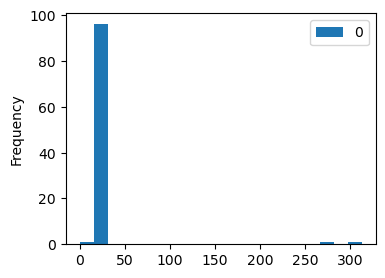

In [6]:
## Task 4:
google2_df.plot.hist(bins=20, figsize=(4, 3))  

 

#### Step 5: Outliers - Visual detection
The data seems to be ok, but not quite. Can you visually spot the outliers? How many did you find?

**Task 5:** Remove outliers you visually noticed from dataset, calculate statistics again and plot modified data. 

- **Note 1.** Round all results to 2 decimals
- **Note 2.** Use np.around() to avoid floating point number rounding problems see https://numpy.org/doc/stable/reference/generated/numpy.around.html

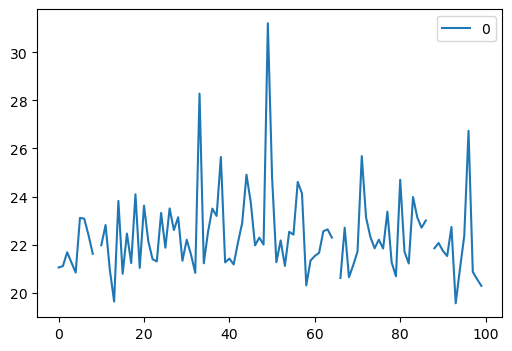

In [7]:
## Task 5:
#poistettavat arvot
outliers_to_NaN = [0.287, 312.616, 277.409]

#dataframe ilman poistettavia arvoja
outl_google2 = google2_df.replace(outliers_to_NaN, np.nan)

#df tulostus
outl_google2.plot(figsize=(6,4))

outl_google2.dropna(inplace=True)
# Count
google2_outl_count = len(outl_google2)

# Mean
mean_value = np.mean(outl_google2)
google2_outl_mean = np.around(mean_value, decimals=2)

# Median
median_value = np.median(outl_google2)
google2_outl_median = np.around(median_value, decimals=2)

# Standard deviation
std_value = outl_google2.std(axis=0) 
google2_outl_std = np.around(std_value[0], decimals=2)

# Kurtosis
kurtosis_value = outl_google2.kurtosis()
google2_outl_kurtosis = np.around(kurtosis_value[0], decimals=2)
# Skew
skew_value = outl_google2.skew()
google2_outl_skew = np.around(skew_value[0], decimals=2)
# IQR (Interquartile Range)
q75, q25 = np.percentile(outl_google2, [75 ,25])
google2_outl_IQR = np.around((q75 - q25), decimals=2)

# Min-value
min_value = np.min(outl_google2)
google2_outl_min = np.around(min_value, decimals=2)
# Max-value
max_value = np.max(outl_google2)
google2_outl_max = np.around(max_value, decimals=2)

 

In [8]:
print("With visual outlier detection:")
print("Count:", google2_outl_count)
print("Mean:", google2_outl_mean)
print("Median:", google2_outl_median)
print("Std:", google2_outl_std)
print("Kurtosis:", google2_outl_kurtosis)
print("Skew:", google2_outl_skew)
print("IRQ:", google2_outl_IQR)
print("Min:", google2_outl_min)
print("Max:", google2_outl_max)


With visual outlier detection:
Count: 96
Mean: 22.37
Median: 22.07
Std: 1.71
Kurtosis: 7.74
Skew: 2.13
IRQ: 1.83
Min: 19.56
Max: 31.21


**Task 6:** Plot data histogram again without outliers. What do you notice?

<Axes: ylabel='Frequency'>

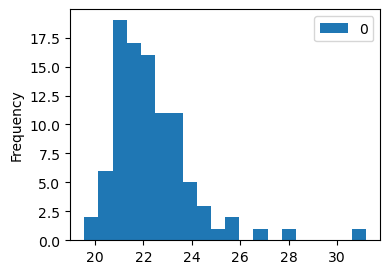

In [9]:
## Task 6:
outl_google2.plot.hist(bins=20, figsize=(4, 3))  

 

***Btw,*** *this is typical ping delay distribution. As you can see, it is not a normal distribution (https://en.wikipedia.org/wiki/Normal_distribution) as white noise distribution. In low end the minimum time is optimal network travel time for IP-packet. And as there is more traffic in the network, there will delayed ping packets that you can see as long tail in the high end.*

#### Step 6: Outliers - Detection with IQR Method 

Get familiar with IQR outlier detection through this article: 
https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

***Task 7:*** Now use the IQR method (with scale 1.5) and remove outliers from dataset and calculate statistics again. Yes, AGAIN. Sorry...

- **Note 1.** Round all results to 2 decimals
- **Note 2.** Use np.around() to avoid floating point number rounding problems see https://numpy.org/doc/stable/reference/generated/numpy.around.html

In [10]:
## Task 7:
# Calculate the IQR (Interquartile Range)
Q1 = google2_df.quantile(0.25)
Q3 = google2_df.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Create a mask to filter out outliers
outlier_mask = (google2_df < Q1 - threshold * IQR) | (google2_df > Q3 + threshold * IQR)

# Remove outliers from the DataFrame
data_cleaned = google2_df[~outlier_mask]

data_cleaned.dropna(inplace=True)
# Count
google2_outl2_count = len(data_cleaned)

# Mean
mean_value = np.mean(data_cleaned)
google2_outl2_mean = np.around(mean_value, decimals=2)

# Median
median_value = np.median(data_cleaned)
google2_outl2_median = np.around(median_value, decimals=2)

# Standard deviation
std_value = data_cleaned.std(axis=0) 
google2_outl2_std = np.around(std_value[0], decimals=2)

# Kurtosis
kurtosis_value = data_cleaned.kurtosis()
google2_outl2_kurtosis = np.around(kurtosis_value[0], decimals=2)

# Skew
skew_value = data_cleaned.skew()
google2_outl2_skew = np.around(skew_value[0], decimals=2)

# IQR (Interquartile Range)
q75, q25 = np.percentile(data_cleaned, [75 ,25])
google2_outl2_IQR = np.around((q75 - q25), decimals=2)

# Min-value
min_value = np.min(data_cleaned)
google2_outl2_min = np.around(min_value, decimals=2)

# Max-value
max_value = np.max(data_cleaned)
google2_outl2_max = np.around(max_value, decimals=2)

 

In [11]:
print("With IQR outlier detection:")
print("Count:", google2_outl2_count)
print("Mean:", google2_outl2_mean)
print("Median:", google2_outl2_median)
print("Std:", google2_outl2_std)
print("Kurtosis:", google2_outl2_kurtosis)
print("Skew:", google2_outl2_skew)
print("IRQ:", google2_outl2_IQR)
print("Min:", google2_outl2_min)
print("Max:", google2_outl2_max)

With IQR outlier detection:
Count: 93
Mean: 22.17
Median: 22.0
Std: 1.25
Kurtosis: 0.35
Skew: 0.63
IRQ: 1.65
Min: 19.56
Max: 25.68


***Task 8:*** And print also the data plot and histogram for continuity.

<Axes: ylabel='Frequency'>

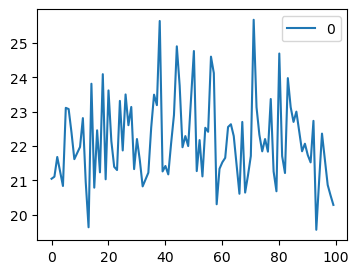

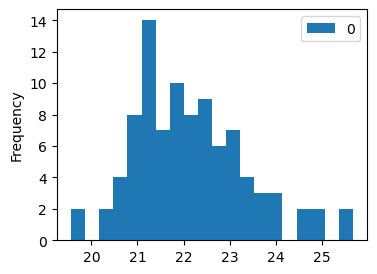

In [12]:
## Task 8:
data_cleaned.plot(figsize=(4,3))

data_cleaned.plot.hist(bins=20, figsize=(4, 3))   

 

### Reflection

Answer following questions:
1. What is the challenge with mean and std, when you do data analysis? 
2. What is IQR?
3. What is outlier?
4. Compare these 3 different datasets:
    - How you should calculate mean?
    - What about deviation?
    - And when you can say that this value is outlier?


*Your answers here...*

### Check your answers by running following cell:

In [13]:
# Do not change this code!

import sys
sys.path.insert(0, '../answers/data_math_answers/')
from data_math1_check import check_length, check_google2, check_google2_outl, check_google2_outl2

print("Results:")

print("PART 'google2_df_length':")
correct = check_length(google2_df_length)
print("\t Correct answers", correct, "/ 1.")

print("PART 'check_google2_df':")
correct = check_google2(google2_count, 
         google2_mean, google2_median, google2_std, google2_kurtosis, google2_skew, google2_IQR, google2_min, google2_max)
print("\t Correct answers", correct, "/ 9.")

print("PART 'check_google2_outl_df':")
correct = check_google2_outl(google2_outl_count, google2_outl_mean, google2_outl_median, google2_outl_std, google2_outl_kurtosis, google2_outl_skew, 
         google2_outl_IQR, google2_outl_min, google2_outl_max)
print("\t Correct answers", correct, "/ 9.")

print("PART 'check_google2_outl2_df':")
correct = check_google2_outl2(google2_outl2_count, google2_outl2_mean, google2_outl2_median, google2_outl2_std, google2_outl2_kurtosis, google2_outl2_skew,
         google2_outl2_IQR, google2_outl2_min, google2_outl2_max)
print("\t Correct answers", correct, "/ 9.")


Results:
PART 'google2_df_length':
	 Correct answers 1 / 1.
PART 'check_google2_df':
	 Correct answers 9 / 9.
PART 'check_google2_outl_df':
	 Correct answers 9 / 9.
PART 'check_google2_outl2_df':
	 Correct answers 9 / 9.


### Nice work! 